In [ ]:
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Modelling libraries
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings



In [4]:
df = pd.read_csv('data/stud.csv')

df.head(5)





,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
list(df.columns)


['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'math_score',
 'reading_score',
 'writing_score']

In [10]:
X = df.drop(columns=['math_score'], axis=1)

In [11]:
y = df['math_score']

In [13]:
# Create column transformer with 3 tyoes of transformers

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include = "object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocesser = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer,cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [14]:

X = preprocesser.fit_transform(X)

In [16]:
# Split the dataset into train and test
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state =42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evalute_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)  # Calculate RMSE
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square  # Returns three values


In [25]:
models = {
    "Linear Regresson":LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbours Regression": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(),
    "Ada Boost Regressor": AdaBoostRegressor()

    }

model_list= []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluation of the models
    model_train_mae, model_train_rmse, model_train_r2 = evalute_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evalute_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for Training Set")
    print(" - Mean Absolute Error: {:.4f}".format(model_train_mae))
    print(" - Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print(" - R2 Score: {:.4f}".format(model_train_r2))

    print("-----------------------------------------------------")

    print("Model performance for Test set")
    print(" - Mean Absolute Error: {:.4f}".format(model_test_mae))
    print(" - Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print(" - R2 Score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)

    print('=' * 35)
    print('\n')


Linear Regresson
Model performance for Training Set
 - Mean Absolute Error: 4.2716
 - Root Mean Squared Error: 5.3293
 - R2 Score: 0.8740
-----------------------------------------------------
Model performance for Test set
 - Mean Absolute Error: 4.2222
 - Root Mean Squared Error: 5.4252
 - R2 Score: 0.8790


Lasso
Model performance for Training Set
 - Mean Absolute Error: 5.2063
 - Root Mean Squared Error: 6.5938
 - R2 Score: 0.8071
-----------------------------------------------------
Model performance for Test set
 - Mean Absolute Error: 5.1579
 - Root Mean Squared Error: 6.5197
 - R2 Score: 0.8253


Ridge
Model performance for Training Set
 - Mean Absolute Error: 4.2650
 - Root Mean Squared Error: 5.3233
 - R2 Score: 0.8743
-----------------------------------------------------
Model performance for Test set
 - Mean Absolute Error: 4.2111
 - Root Mean Squared Error: 5.3904
 - R2 Score: 0.8806




C:\Users\mario\AppData\Roaming\Python\Python310\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\mario\AppData\Roaming\Python\Python310\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "d:\MLProject1\venv\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "d:\MLProject1\venv\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "d:\MLProject1\venv\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


K-Neighbours Regression
Model performance for Training Set
 - Mean Absolute Error: 4.5168
 - Root Mean Squared Error: 5.7079
 - R2 Score: 0.8555
-----------------------------------------------------
Model performance for Test set
 - Mean Absolute Error: 5.6210
 - Root Mean Squared Error: 7.2530
 - R2 Score: 0.7838


Decision Tree
Model performance for Training Set
 - Mean Absolute Error: 0.0187
 - Root Mean Squared Error: 0.2795
 - R2 Score: 0.9997
-----------------------------------------------------
Model performance for Test set
 - Mean Absolute Error: 6.0850
 - Root Mean Squared Error: 7.5792
 - R2 Score: 0.7639


Random Forest
Model performance for Training Set
 - Mean Absolute Error: 1.8079
 - Root Mean Squared Error: 2.2778
 - R2 Score: 0.9770
-----------------------------------------------------
Model performance for Test set
 - Mean Absolute Error: 4.6355
 - Root Mean Squared Error: 6.0029
 - R2 Score: 0.8519


XGBRegressor
Model performance for Training Set
 - Mean Absolute E

In [26]:
df_results = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)
df_results

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regresson,0.879046
8,Ada Boost Regressor,0.855832
5,Random Forest,0.851916
7,CatBoosting Regressor,0.851632
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbours Regression,0.783813
4,Decision Tree,0.763930


In [32]:


lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100

# Corrected print statement
print(f"Accuracy of the model is {score:.2f}%")


Accuracy of the model is 87.90%


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming you have your features in X and target variable in y
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lin_model.predict(X_test)


# Calculate and print the R^2 score
score = r2_score(y_test, y_pred) * 100
print(f"Accuracy of the model is {score:.2f}%")


Accuracy of the model is 87.90%


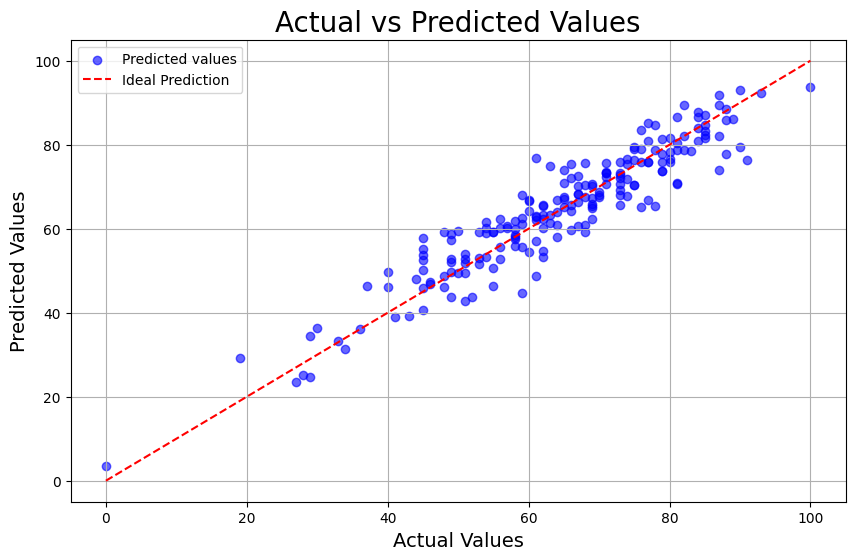

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted values', alpha=0.6)

# Plotting the 45-degree line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction')

# Adding titles and labels
plt.title('Actual vs Predicted Values', fontsize=20)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [36]:
# Calculate the difference (residuals)
residuals = y_test - y_pred

# Display the first few differences
print("Differences (Actual - Predicted):")
print(residuals.head())


Differences (Actual - Predicted):
521    14.5625
737    -6.3125
740     3.3750
660    -2.5625
411    -3.7500
Name: math_score, dtype: float64


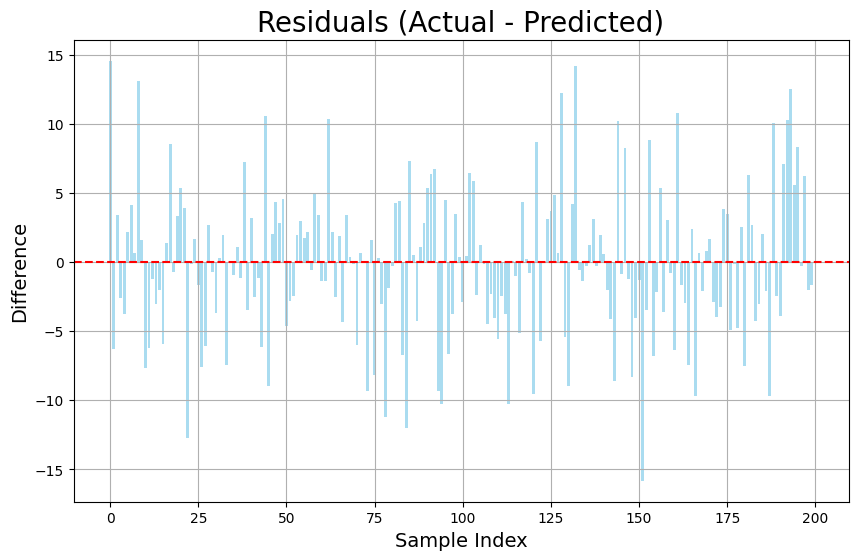

In [37]:
# Plotting the differences (residuals)
plt.figure(figsize=(10, 6))
plt.bar(range(len(residuals)), residuals, color='skyblue', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')  # Line at y=0 for reference
plt.title('Residuals (Actual - Predicted)', fontsize=20)
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Difference', fontsize=14)
plt.grid()
plt.show()
